In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sb
sb.set()
import scipy.optimize as optimization
import datetime as dt
from datetime import timedelta
from matplotlib import rcParams
rcParams['figure.figsize'] = 10,6
import math
import scipy.stats
import matplotlib.pyplot as plt
import time
from ipywidgets import Checkbox
import pandas_datareader as pdr
import warnings
warnings.filterwarnings("ignore")

In [2]:
portfolio_value = pd.read_csv('../ModernPortfolioStepByStep/portfolio_value.csv', index_col='Date')
cum_returns = pd.read_csv('../ModernPortfolioStepByStep/cum_returns.csv', index_col='Date')

n = 252
investmentAmt = 100000

In [3]:
start = pd.to_datetime(portfolio_value.index[0]) + timedelta(days=-1)
end = portfolio_value.index[-1]

In [4]:
portfolio_value['Portfolio_total'] = portfolio_value.sum(axis=1)

##### BEnchmark

In [5]:
date_range = pd.date_range(start, end, freq='b')

In [6]:
benchmark = pd.DataFrame(index=date_range)

In [7]:
benchmark['benchmark'] = pdr.get_data_yahoo(['CSPX.L'], start = start, end = end)['Adj Close']

In [8]:
benchmark = benchmark.fillna(method="bfill")

In [9]:
benchmark_cum = ((benchmark.pct_change(1).cumsum().dropna()+1)*investmentAmt)['benchmark'].values

In [10]:
portfolio_value['benchmark'] = benchmark_cum

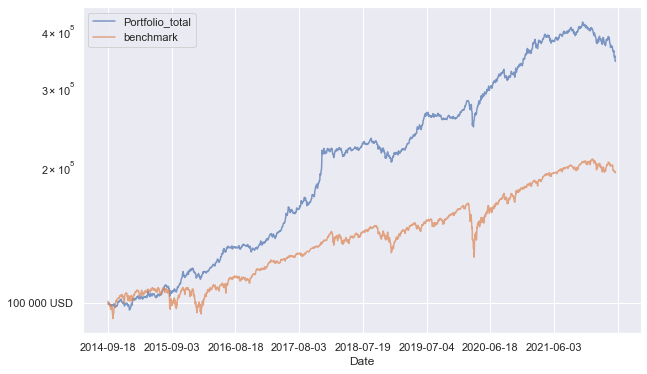

In [11]:
fig, ax = plt.subplots()
portfolio_value.reset_index().plot(x = 'Date', y = 'Portfolio_total', ax = ax, alpha=0.7)
portfolio_value.reset_index().plot(x = 'Date', y = 'benchmark', ax = ax, alpha=0.7)

# lets use log view on chart
plt.yscale('log')

# Format Y labels to be more readable for user
y_value=['{:,.0f}'.format(x).replace(",", " ") + ' USD' for x in ax.get_yticks()]
ax.set_yticklabels(y_value);

### Cum returns

In [27]:
benchmark[1:].pct_change().dropna().values

array([[ 0.00221468],
       [-0.00842995],
       [-0.00324655],
       ...,
       [-0.00966013],
       [ 0.00227994],
       [-0.00780924]])

In [25]:
d_rets = portfolio_value[['Portfolio_total']].pct_change().dropna()

In [28]:
d_rets['benchmark'] = benchmark[1:].pct_change().dropna().values

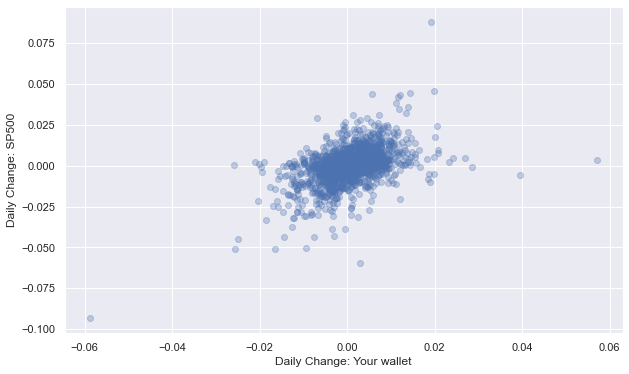

In [40]:
plt.scatter(d_rets['Portfolio_total'],d_rets['benchmark'],alpha=0.3)
plt.xlabel("Daily Change: Your wallet")
plt.ylabel("Daily Change: SP500");

In [31]:
from scipy.stats import linregress

In [36]:
beta_apple, alpha_apple, _, _, _ = linregress(d_rets["benchmark"], d_rets["Portfolio_total"])

In [37]:
print(f"beta of your wallet: {beta_apple}, Alpha: {alpha_apple}")

beta of your wallet: 0.287963688076643, Alpha: 0.0005047580922338694


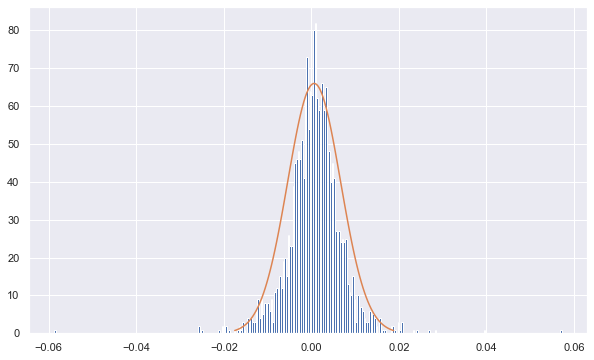

In [38]:
from scipy.stats import norm
plt.hist(d_rets["Portfolio_total"], bins=300)
stock_variance = d_rets["Portfolio_total"].var()
stock_mean = d_rets["Portfolio_total"].mean()
sigma = np.sqrt(stock_variance)
x = np.linspace(stock_mean - 3 * sigma, stock_mean + 3 * sigma, 100)
plt.plot(x, norm.pdf(x, stock_mean, sigma))
plt.show()

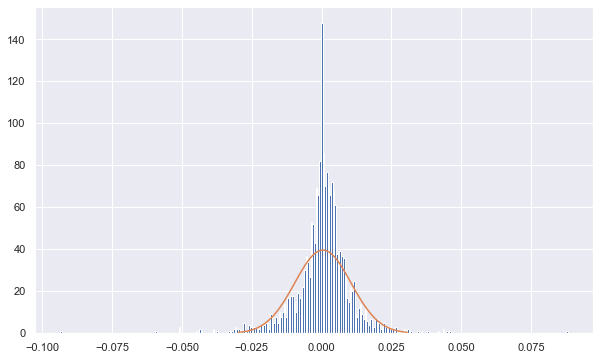

In [39]:
from scipy.stats import norm
plt.hist(d_rets["benchmark"], bins=300)
stock_variance = d_rets["benchmark"].var()
stock_mean = d_rets["benchmark"].mean()
sigma = np.sqrt(stock_variance)
x = np.linspace(stock_mean - 3 * sigma, stock_mean + 3 * sigma, 100)
plt.plot(x, norm.pdf(x, stock_mean, sigma))
plt.show()